### Работа выполнил: Зеленин Герман Евгеньевич

Импортируем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

Загружаем датасет

In [3]:
data_train = pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')

Идея 1: Выделить год, в который квартира продавалась

In [4]:
year_list = list()
for i in range(data_train.shape[0]):
    year_list.append(int(data_train['timestamp'][i][:4]))
data_train['year'] = year_list

In [5]:
year_list = list()
for i in range(data_test.shape[0]):
    year_list.append(int(data_test['timestamp'][i][:4]))
data_test['year'] = year_list

In [6]:
del data_train['timestamp']
del data_test['timestamp']

Идея зашла и модель улучшилась.

Гипотеза: месяц так же будет улучшать модель. Не проверял

Логарифмируем цену. Показалось, что качество становится лучше.

In [7]:
data_train['result_price'] = np.log1p(data_train['result_price'])

Выделил не категориальные признаки и начал чистку

In [8]:
columns = ['kitchen_area',
 'kremlin_distance',
 'base_school_distance',
 'office_count',
 'rooms_num',
 'state',
 'floors_num',
 'road_distance_2',
 'wall_material',
 'railway_station_distance',
 'district_area',
 'green_part',
 'bulvar_ring_km',
 'living_area',
 'leisure_count',
 'cafe_count',
 'malls_count',
 'sport_count',
 'healthcare_centers_count',
 'park_distance',
 'district_population',
 'mkad_distance',
 'sadovoe_km',
 'road_distance_1',
 'bus_station_distance',
 'green_zone_distance',
 'public_transport_station_distance',
 'floor',
 'fitness_center_distance',
 'total_area',
 'market_count']

Выбор следующих чисел обусловлен изучением графиков. Удалил из-за слишком большого места.


In [9]:
data_train = data_train.drop(data_train[(data_train[columns[0]] > 25) | (data_train['result_price'] < 13)].index)
i = 1
data_train = data_train.drop(data_train[(data_train[columns[1]] > 45) | (data_train['result_price'] < 13.5)].index)
i = 2
data_train = data_train.drop(data_train[(data_train[columns[i]] > 16) | (data_train['result_price'] < 13.5)].index)
i = 4
data_train = data_train.drop(data_train[(data_train[columns[i]] > 5) | (data_train['result_price'] < 13.5) | (data_train[columns[i]] < 1)].index)
i = 5
data_train = data_train.drop(data_train[(data_train[columns[i]] > 30) | (data_train['result_price'] < 13.5)].index)
i = 6
data_train = data_train.drop(data_train[(data_train[columns[i]] > 50) | (data_train['result_price'] < 13)].index)
i = 7
data_train = data_train.drop(data_train[(data_train[columns[i]] > 12) | (data_train['result_price'] < 13)].index)
i = 8
data_train = data_train.drop(data_train[(data_train[columns[i]] == 3) | (data_train['result_price'] < 13)].index)
i = 13
data_train = data_train.drop(data_train[(data_train[columns[i]] > 175) | (data_train['result_price'] < 13)].index)
i = 19
data_train = data_train.drop(data_train[(data_train[columns[i]] > 20) | (data_train['result_price'] < 13)].index)
i = 21
data_train = data_train.drop(data_train[(data_train[columns[i]] > 30) | (data_train['result_price'] > 18)].index)
i = 24
data_train = data_train.drop(data_train[(data_train[columns[i]] > 37) | (data_train['result_price'] > 18)].index)
i = 26
data_train = data_train.drop(data_train[(data_train[columns[i]] > 60) | (data_train['result_price'] > 18)].index)
i = 27
data_train = data_train.drop(data_train[(data_train[columns[i]] > 40) | (data_train['result_price'] < 13)].index)
i = 28
data_train = data_train.drop(data_train[(data_train[columns[i]] > 8) | (data_train['result_price'] < 13)].index)
i = 29
data_train = data_train.drop(data_train[(data_train[columns[i]] > 300) | (data_train['result_price'] < 13)].index)

Пример такого графика

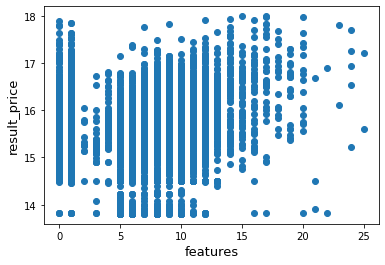

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data_train[columns[0]], y = data_train['result_price'])
plt.ylabel('result_price', fontsize=13)
plt.xlabel('features', fontsize=13)
plt.show()

Идея №2: В большом количестве строчек не было указано года постройки дома. Гипотеза состояла в том, что изменение NaN на среднее по району, а не по всей Москве, улучшит ситуацию, но как показала практика, стало только хуже...

In [12]:
# all_district = list(data_train['district_name'].unique())

# mean_year = {}

# for name_district in all_district:
#     mean_year[name_district] = round(data_train[(data_train['district_name'] == name_district) & (data_train["year_of_construction"]>=1500) & (data_train["year_of_construction"]<2050)]['year_of_construction'].mean())

# bad_row = list(data_train[(data_train['year_of_construction'].isnull()) | (data_train["year_of_construction"]<=1500) | (data_train["year_of_construction"]>=2050)]["id"])

# all_row = list(data_train["id"])

# new_column_year = list()


# for i in all_row:
#     if i in bad_row:
#         new_column_year.append(mean_year[data_train[data_train["id"] == i]["district_name"].describe()["top"]])
#     else:
#         new_column_year.append(data_train[data_train["id"] == i]["year_of_construction"].mean())
        
# del data_train['year_of_construction']
# data_train['year_of_construction'] = new_column_year

In [13]:
# all_district = list(data_test['district_name'].unique())

# bad_row = list(data_test[(data_test['year_of_construction'].isnull()) | (data_test["year_of_construction"]<=1500) | (data_test["year_of_construction"]>=2050)]["id"])

# all_row = list(data_test["id"])

# new_column_year = list()


# for i in all_row:
#     if i in bad_row:
#         if data_test[data_test["id"] == i]["district_name"].describe()["top"] in list(mean_year.keys()):
#             new_column_year.append(mean_year[data_test[data_test["id"] == i]["district_name"].describe()["top"]])
#         else:
#             new_column_year.append(1985)
#     else:
#         new_column_year.append(data_test[data_test["id"] == i]["year_of_construction"].mean())
        
# del data_test['year_of_construction']
# data_test['year_of_construction'] = new_column_year

Идея №3: Заменить Nan state так же средним по району. Гипотеза провалилась.

In [14]:
# all_district = list(data_train['district_name'].unique())

# mean_state = {}

# for name_district in all_district:
#     mean_state[name_district] = round(data_train[(data_train['district_name'] == name_district)]['state'].mean())

# bad_row = list(data_train[(data_train['state'].isnull())]["id"])

# all_row = list(data_train["id"])

# new_column_state = list()


# for i in all_row:
#     if i in bad_row:
#         new_column_state.append(mean_state[data_train[data_train["id"] == i]["district_name"].describe()["top"]])
#     else:
#         new_column_state.append(data_train[data_train["id"] == i]["state"].mean())

# del data_train['state']
# data_train['state'] = new_column_state

In [15]:
# all_district = list(data_test['district_name'].unique())

# bad_row = list(data_test[(data_test['state'].isnull())]["id"])

# all_row = list(data_test["id"])

# new_column_state = list()


# for i in all_row:
#     if i in bad_row:
#         if data_test[data_test["id"] == i]["district_name"].describe()["top"] in list(mean_state.keys()):
#             new_column_state.append(mean_state[data_test[data_test["id"] == i]["district_name"].describe()["top"]])
#         else:
#             new_column_state.append(1985)
#     else:
#         new_column_state.append(data_test[data_test["id"] == i]["state"].mean())
        
# del data_test['state']
# data_test['state'] = new_column_state

Идея 4: При изучении данных было обнаружено, что total_area указана во всех данных, однако много пропусков в rooms_num, kitchen_area, living_area. Попробовал заменить Nan в rooms_num согласно следующему правилу. Оно было установлено после изучения средних total_area по rooms_num и поиску в интернете)))

0 - 43 - 1 комнатная

43 - 63.5 - 2 комнатная

63.5 - 87 - 3 комнатная

87 - 106.5 - 4 комнатная

106.5 > - 5 комнатная

In [15]:
list_new_column = list()
for i in range(data_train.shape[0]):
    if np.isnan(data_train.iloc[i]['rooms_num']):
        total_area = data_train.iloc[i]['total_area']
        if 0<=total_area<=43:
            list_new_column.append(1)
        if 43<total_area<=63.5:
            list_new_column.append(2)
        if 63.5<total_area<=87:
            list_new_column.append(3)
        if 87<total_area<=106.5:
            list_new_column.append(4)
        if 106.5<total_area:
            list_new_column.append(5)
    else:
        total_area = data_train.iloc[i]['rooms_num']
        list_new_column.append(total_area)

In [16]:
del data_train["rooms_num"]
data_train['rooms_num'] = list_new_column

Такая идея сработала, не проверял на  kitchen_area, living_area. Остальные данные заполнил просто средними или UNKNOWS, если признак категориальный

In [22]:
def HandleMissingValues(df):
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKNOWN'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values, inplace=True)
    
    
HandleMissingValues(data_train)
HandleMissingValues(data_test)

Идея 5: добавить среднюю цену по району. Очень хорошо помогло.

In [23]:
mean_price = {}

In [24]:
all_district = list(data_train['district_name'].unique())

In [25]:
for name_district in all_district:
    mean_price[name_district] = data_train[data_train['district_name'] == name_district]['result_price'].mean()

In [26]:
list_new_column = list()
for i in range(data_train.shape[0]):
    name = data_train.iloc[i]['district_name']
    list_new_column.append(mean_price[name])

In [27]:
data_train['mean_price'] = list_new_column

In [28]:
list_new_column = list()
for i in range(data_test.shape[0]):
    name = data_test.iloc[i]['district_name']
    if name in mean_price.keys():
        list_new_column.append(mean_price[name])
    else:
        list_new_column.append(14.7)

In [29]:
data_test['mean_price'] = list_new_column

Идея 6: добавить плотность населения. кажется, что не принесло особо хороших результатов. без улучшений

In [30]:
people_per_district = {}

In [31]:
for name_district in all_district:
    people_per_district[name_district] = data_train[data_train['district_name'] == name_district]['district_population'].mean()/data_train[data_train['district_name'] == name_district]['district_area'].mean()

In [32]:
list_new_column = list()
for i in range(data_train.shape[0]):
    name = data_train.iloc[i]['district_name']
    list_new_column.append(people_per_district[name])

In [33]:
data_train['people_per_district'] = list_new_column

In [34]:
list_new_column = list()
for i in range(data_test.shape[0]):
    name = data_test.iloc[i]['district_name']
    if name in mean_price.keys():
        list_new_column.append(people_per_district[name])
    else:
        list_new_column.append(0.001)

In [35]:
data_test['people_per_district'] = list_new_column

In [36]:
del data_train['district_name']
del data_train['district_area']
del data_train['district_population']

del data_test['district_name']
del data_test['district_area']
del data_test['district_population']

Переводим категориальные в бинарные

In [39]:
def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

def PerformOneHotEncoding(df, columnsToEncode):
    return pd.get_dummies(df, columns=columnsToEncode)

cat_cols = getObjectColumnsList(data_train)
data_train = PerformOneHotEncoding(data_train, cat_cols)
data_test = PerformOneHotEncoding(data_test, cat_cols)

In [41]:
del data_train['id']

METRIC

Задаем функцию для подсчета RMSLE, а так же функцию для катбуста. Была взяла с хабра: https://habr.com/ru/sandbox/163469/

In [43]:
def metric_RMSLE(y, y_hat, N):
    print(np.sqrt(sum((np.log1p(y+1)-np.log1p(y_hat+1))*(np.log1p(y+1)-np.log1p(y_hat+1)))/N))

In [44]:
import math
class RMSLE(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)

        result = []
        for index in range(len(targets)):
            val = max(approxes[index], 0)
            der1 = math.log1p(targets[index]) - math.log1p(max(0, approxes[index]))
            der2 = -1 / (max(0, approxes[index]) + 1)

            if weights is not None:
                der1 *= weights[index]
                der2 *= weights[index]

            result.append((der1, der2))
        return result
class RMSLE_val(object):
    def get_final_error(self, error, weight):
        return np.sqrt(error / (weight + 1e-38))

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += w * ((math.log1p(max(0, approx[i])) - math.log1p(max(0, target[i])))**2)

        return error_sum, weight_sum

В КЕГЛ

Подгружаем катбуст, получаем все данные для обычения

In [43]:
import catboost as cb
from catboost import CatBoostRegressor

In [42]:
X_train = data_train[list(set(list(data_train.columns))-set(['result_price']))]
y_train = data_train['result_price']

In [44]:
X_test = data_test[list(set(list(data_train.columns))-set(['result_price']))]

Запускаем катбуст с перебором параметров:

In [ ]:
import catboost as cb
from catboost import CatBoostRegressor
train_dataset = cb.Pool(X_train, y_train) 

model = CatBoostRegressor(iterations=3000,
                          early_stopping_rounds=100,
                          grow_policy = 'Depthwise',
                          depth=8,
                          loss_function=RMSLE(),
                          l2_leaf_reg = 1,
                          learning_rate=0.03,
                          verbose=10,
                          eval_metric=RMSLE_val())

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.05, 0.1, 0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

Получем его предикт

In [46]:
pred = model.predict(X_test)
y_hat_cat_boost = np.exp(pred)

Обучаем xgboost

In [47]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=340, max_depth=2, learning_rate=0.2)
model_xgb.fit(X_train, y_train)
xgb_preds = model_xgb.predict(X_test)

Обучаем lightgbm

In [ ]:
from lightgbm import LGBMRegressor

model_LGBM = LGBMRegressor(objective='regression',
                        num_leaves=166,
                        learning_rate=0.05, 
                        n_estimators=120,
                        max_bin = 55, 
                        bagging_fraction = 0.8,
                        bagging_freq = 5, 
                        feature_fraction = 0.2319,
                        feature_fraction_seed=9, 
                        bagging_seed=9,
                        min_data_in_leaf =6, 
                        min_sum_hessian_in_leaf = 11)

model_LGBM.fit(X_train, y_train)

predicted_y = model_LGBM.predict(X_test)

Собираем как средние трех результатов

In [219]:
id_column = data_test["id"]
result_column = (y_hat_cat_boost+np.exp(xgb_preds) + np.exp(predicted_y))/3
dataset = pd.DataFrame({'id': id_column, 'result_price': list(result_column)}, columns=['id', 'result_price'])

In [220]:
dataset.to_csv("sample_submission.csv", index=False)